mu theta = 157.14443118953648
std theta = 93.70788528810927
dispersion =  0.737485335479297
accuracy =  -22.44448231561007
precision =  26.251466452070304


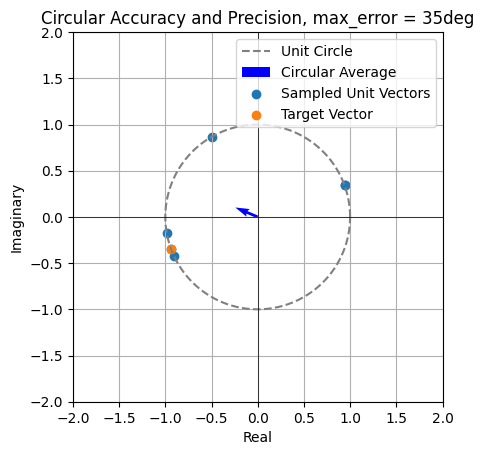

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
target = 200
target_vec = np.exp(1j * np.deg2rad(target))
# angles = (np.random.normal(target, 40, 50) + 360) % 360
angles = [205, 190, 200, 20, 20, 120]

rad = np.deg2rad(angles)
vecs = np.exp(1j * rad)
mu = np.mean(vecs)
std = np.std(vecs)
R = np.abs(mu)
dispersion = 1 - R
mu_theta = (np.angle(mu, deg=True) + 360) % 360

max_error = 35
error = np.abs(mu_theta - target) % 360
accuracy = (1 - error / max_error) * 100
precision = (1 - dispersion) * 100

print("mu theta =", mu_theta)
print("std theta =", np.rad2deg(np.sqrt(-2 * np.log(R))))
print("dispersion = ", dispersion)

print("accuracy = ", accuracy)
print("precision = ", precision)

# Unit circle
circle = np.exp(1j * np.linspace(0, 2 * np.pi, 500))
plt.plot(circle.real, circle.imag, linestyle='--', color='gray', label="Unit Circle")

# Plot the vectors
plt.quiver(0, 0, mu.real, mu.imag, angles='xy', scale_units='xy', scale=1, color='blue', label="Circular Average")
plt.scatter(vecs.real, vecs.imag, label="Sampled Unit Vectors")
plt.scatter(target_vec.real, target_vec.imag, label="Target Vector")

# Axis settings
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"Circular Accuracy and Precision, max_error = {max_error}deg")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend()
plt.grid()
plt.show()